In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
irs = pd.read_csv("test123.csv", encoding="ISO-8859-1")
irs

NameError: name 'pd' is not defined

C:\Users\tejus\AppData\Local\Temp\ipykernel_2072\365933455.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(irs.corr())


<Axes: >

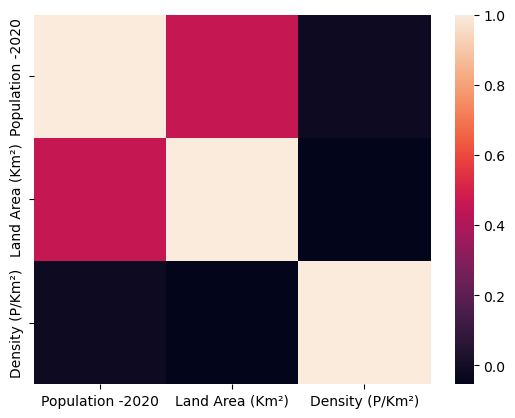

In [3]:
sb.heatmap(irs.corr())

In [4]:
irs.drop("textID",axis=1,inplace=True)
irs.drop("Time of Tweet",axis=1,inplace=True)
irs.drop("Age of User",axis=1,inplace=True)
irs.drop("Country",axis=1,inplace=True)
irs.drop("Population -2020",axis=1,inplace=True)
irs.drop("Land Area (Km²)",axis=1,inplace=True)
irs.drop("Density (P/Km²)",axis=1,inplace=True)

In [5]:
#irs=pd.get_dummies(irs,drop_first=True)

In [6]:
#irs=pd.get_dummies(irs,drop_first=True)

<Axes: xlabel='sentiment', ylabel='Count'>

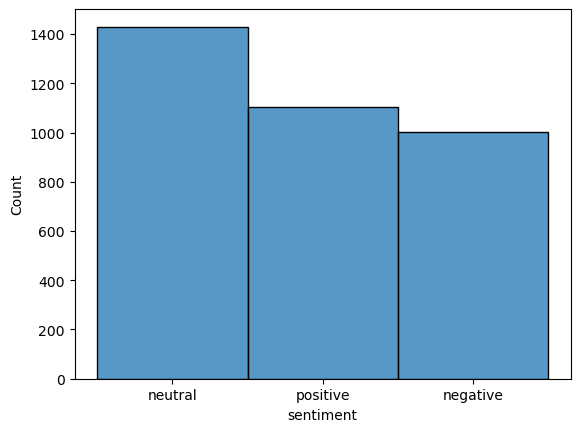

In [7]:

sb.histplot(irs["sentiment"])

In [8]:
import seaborn as sns

In [9]:
X_train=irs.drop('sentiment',axis=1)
y_train=irs['sentiment']

In [10]:
X_train = X_train.values.tolist()

In [11]:
y_train=y_train.tolist()

In [12]:
flat_list = [item for sublist in X_train for item in sublist]
X_train=flat_list

In [13]:
X_train

['Last session of the day  http://twitpic.com/67ezh',
 ' Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China:  (SH)  (BJ).',
 'Recession hit Veronique Branquinho, she has to quit her company, such a shame!',
 ' happy bday!',
 ' http://twitpic.com/4w75p - I like it!!',
 ' that`s great!! weee!! visitors!',
 'I THINK EVERYONE HATES ME ON HERE   lol',
 ' soooooo wish i could, but im in school and myspace is completely blocked',
 ' and within a short time of the last clue all of them',
 ' What did you get?  My day is alright.. haven`t done anything yet. leaving soon to my stepsister though!',
 'My bike was put on hold...should have known that.... argh total bummer',
 ' I checked.  We didn`t win',
 ' .. and you`re on twitter! Did the tavern bore you that much?',
 'I`m in VA for the weekend, my youngest son turns 2 tomorrow......it makes me kinda sad, he is getting so big, check out my twipics',
 'Its coming out the socket  I feel like my phones hole is no

In [14]:
#X_train # Reviews

In [15]:
from nltk.tokenize import RegexpTokenizer

In [16]:
from nltk.stem.porter import PorterStemmer
# NLTK -> Stem -> Porter -> PorterStemmer

from nltk.corpus import stopwords
# NLTK -> Corpus -> stopwords

In [17]:
# Downloading the stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
tokenizer = RegexpTokenizer(r"\w+")
en_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

In [19]:
def getCleanedText(text):
    if isinstance(text, str):
        text = text.lower()
        # Tokenizing
        tokens = tokenizer.tokenize(text)
        new_tokens = [token for token in tokens if token not in en_stopwords]
        stemmed_tokens = [ps.stem(token) for token in new_tokens]
        clean_text = " ".join(stemmed_tokens)
        return clean_text
    else:
        return ''

In [20]:
import gradio as gr
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [21]:
X_test = ['bad'];
type(X_test)
X_clean = [getCleanedText(i) for i in X_train]
xt_clean = [getCleanedText(i) for i in X_test]
cv = CountVectorizer(ngram_range = (1,2))
X_vec = cv.fit_transform(X_clean).toarray()
Xt_vect = cv.transform(xt_clean).toarray()
mn = MultinomialNB()
mn.fit(X_vec, y_train)
y_pred = mn.predict(Xt_vect)

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
X_clean

['last session day http twitpic com 67ezh',
 'shanghai also realli excit precis skyscrap galor good tweep china sh bj',
 'recess hit veroniqu branquinho quit compani shame',
 'happi bday',
 'http twitpic com 4w75p like',
 'great weee visitor',
 'think everyon hate lol',
 'soooooo wish could im school myspac complet block',
 'within short time last clue',
 'get day alright done anyth yet leav soon stepsist though',
 'bike put hold known argh total bummer',
 'check win',
 'twitter tavern bore much',
 'va weekend youngest son turn 2 tomorrow make kinda sad get big check twipic',
 'come socket feel like phone hole virgin loos',
 'hot today _ like hate new timet bad week',
 'miss',
 'cramp',
 'guy say hi answer question yesterday nice song',
 'go spiritu stagnent explod ego realis great ok',
 'stupid storm river us tonight',
 'dead grandpa pay attent',
 'need retail therapi bad ahhh gimm money geebu',
 'go sleep',
 'lame go make breakfast',
 'that cool',
 'hey peopl dont hate ground haha im

In [24]:
Xt_1d = Xt_vect.flatten()

# Alternatively, using the ravel() method
Xt_1d = Xt_vect.ravel()

C:\Users\tejus\AppData\Local\Temp\ipykernel_2072\1777648558.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(Xt_1d)


<Axes: ylabel='Density'>

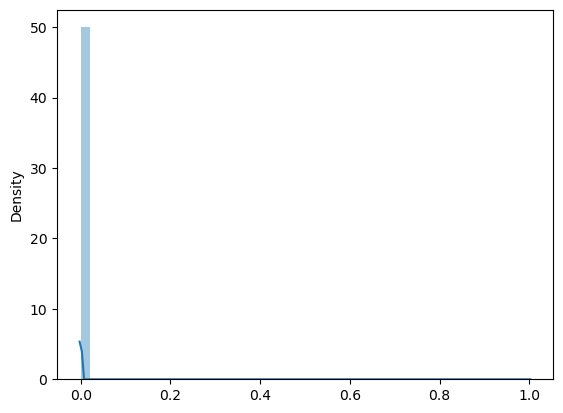

In [25]:
sb.distplot(Xt_1d)

([<matplotlib.patches.Wedge at 0x1a7413df700>,
  ...],
 [Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),

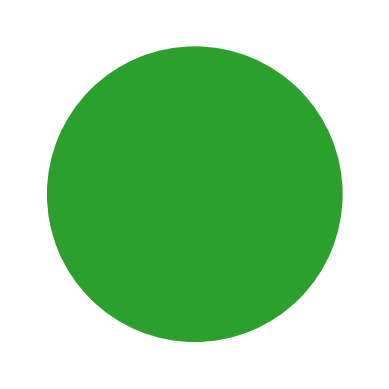

In [26]:
plt.pie(Xt_1d)

Text(0.5, 1.0, 'LINE GRAPH')

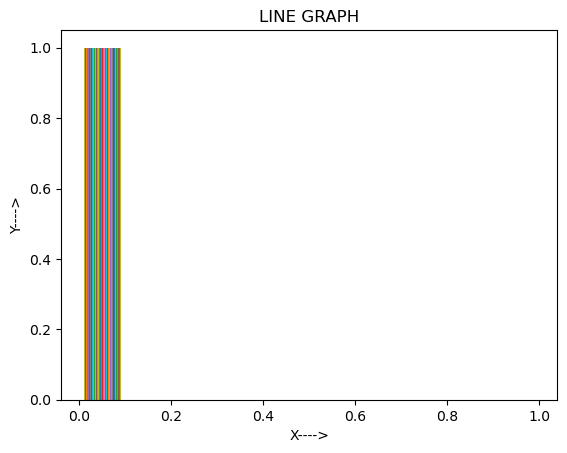

In [27]:
plt.hist(Xt_vect) #plot #scatter #bar #hist only one attribute;
plt.xlabel("X---->")
plt.ylabel("Y---->")
plt.title("LINE GRAPH")

In [28]:
def expenses(CreditScore):
    X_test = [CreditScore];
    type(X_test)
    X_clean = [getCleanedText(i) for i in X_train]
    xt_clean = [getCleanedText(i) for i in X_test]
    cv = CountVectorizer(ngram_range = (1,2))
    X_vec = cv.fit_transform(X_clean).toarray()
    Xt_vect = cv.transform(xt_clean).toarray()
    mn = MultinomialNB()
    mn.fit(X_vec, y_train)
    y_pred = mn.predict(Xt_vect)
    return y_pred[0]

In [29]:
app = gr.Interface(fn=expenses,
 inputs=[gr.inputs.Textbox(label="Enter the Text"),],
 outputs=gr.outputs.Textbox(),
 title="Social Media Sentiment Analysis")

C:\Users\tejus\anaconda3\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\tejus\anaconda3\lib\site-packages\gradio\inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\tejus\anaconda3\lib\site-packages\gradio\inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\tejus\anaconda3\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


In [30]:
app.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
